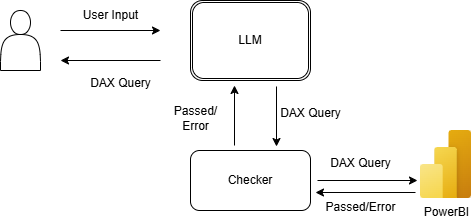

In [1]:
# Import
import os
from dotenv import load_dotenv
from openai import OpenAI

In [2]:
load_dotenv(override=True)

True

In [3]:
# load api_key
AZURE_OPENAI_ENDPOINT = os.getenv('AZURE_OPENAI_ENDPOINT')
AZURE_OPENAI_DEPLOYMENT_NAME = os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME')
AZURE_OPENAI_API_VERSION = os.getenv('AZURE_OPENAI_API_VERSION')
AZURE_OPENAI_API_KEY = os.getenv('AZURE_OPENAI_API_KEY')
AZURE_OPENAI_MODEL = os.getenv('AZURE_OPENAI_MODEL')


if AZURE_OPENAI_API_KEY:
    print(f"Open API Key exists and begins {AZURE_OPENAI_API_KEY[:8]}")

if AZURE_OPENAI_MODEL:
    print(f"The model {AZURE_OPENAI_MODEL}")

Open API Key exists and begins 0f94e715
The model gpt-5.2


In [4]:
# Define a singleton client

openAIClient = OpenAI(
  api_key=AZURE_OPENAI_API_KEY,
  base_url=f"{AZURE_OPENAI_ENDPOINT}/openai/deployments/{AZURE_OPENAI_DEPLOYMENT_NAME}",
  default_query={"api-version": AZURE_OPENAI_API_VERSION},
  default_headers={"api-key": AZURE_OPENAI_API_KEY}
)

In [5]:
from pathlib import Path

file_path = Path('docs') / 'instructions_orig.txt'

with open(file_path, 'r', encoding='utf-8') as f:
  instructions = f.read()

print(instructions)

You are a senior Power BI DAX Query Engineer.
Your task is to generate executable DAX queries for Power BI to answer USER QUESTION.

RULES:
- Return ONLY a valid DAX query
- Use the TABLES, RELATIONSHIPS and MEASURES to form the DAX query
- Use the GUIDELINES when form the DAX query
- User EVALUATE to return results
- Do NOT use DEFINE, VAR, or custom measures
- The query MUST be executable in Power BI
- DO NOT include explanations, comments, or markdown
- DO NOT wrap the query in code fences
- If required information is missing, return:
  "INSUFFICIENT CONTEXT: <reason>"

TABLES:
- MST_CUSTOMER: Customers information
- MST_DISTRIBUTOR: Distributors information
- MST_PRODUCT: Products information
- MST_ROUTE: Routes information
- TXN_INVOICE: Invoice transactions
- MST_CALENDAR: Calendar information

MST_CUSTOMER
- [TENANT] (Text): tenant
- [MARKET] (Text): Country name
- [CUST_ID] (Text): Sales customer ID
- [CUST_CD] (Text): Sales customer code
- [CUST_NAME] (Text): Sales customer na

In [6]:
from utils.dax_generate import DaxGenerate

daxGenerator = DaxGenerate(openAIClient, AZURE_OPENAI_MODEL, instructions)


In [7]:
user_queries = [
  'Show me the top 3 products sales in Jan?',
  # 'Based on the top 5 distributors on sales, what are the top 3 products sold by each distributors?',
  # 'Show me the top 10 customers in March?',
  # 'Show me the top 5 distributor based on sales between March and December, 2025',
  # 'Show me the 5 ideals routes that can boast the sales.',
  # 'Suggest me the top 5 customers that can be potentially targeted'
]

for user_input in user_queries:
  print('-' * 80)
  print(f"Question: {user_input}")
  query = daxGenerator.generate_with_check(user_input)
  print(query)

--------------------------------------------------------------------------------
Question: Show me the top 3 products sales in Jan?
Could not execute the query. Correcting the existing prompt and query.
EVALUATE
TOPN (
    3,
    SUMMARIZECOLUMNS (
        MST_PRODUCT[PRD_ID],
        MST_PRODUCT[PRD_CD],
        MST_PRODUCT[PRD_DESC],
        FILTER ( ALL ( MST_CALENDAR ), MST_CALENDAR[MONTH] = 1 ),
        "Total Sales", CALCULATE ( SUM ( TXN_INVOICE[INV_NET_AMT] ) )
    ),
    [Total Sales], DESC,
    MST_PRODUCT[PRD_ID], ASC
)
